# Explorative Data Analysis

## Load data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [3]:
train.shape

(300000, 32)

In [4]:
test.shape

(200000, 31)

In [5]:
cont_cols = [x for x in train.columns if x.startswith('cont')]
cont_cols

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10']

In [6]:
cat_cols = [x for x in train.columns if x.startswith('cat')]
cat_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18']

## Distribution of target

In [7]:
train['target'].mean()

0.26487

Slightly unbalanced.

# Missing data?

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cat10   200000 non-null  object 
 12  cat11   200000 non-null  object 
 13  cat12   200000 non-null  object 
 14  cat13   200000 non-null  object 
 15  cat14   200000 non-null  object 
 16  cat15   200000 non-null  object 
 17  cat16   200000 non-null  object 
 18  cat17   200000 non-null  object 
 19  cat18   200000 non-null  object 
 20  cont0   200000 non-null  float64
 21  cont1   20

No missing data

# Summary statistics

In [10]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [11]:
train[cat_cols].describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,15,19,13,20,84,16,51,61,19,299,2,2,2,2,4,4,4,4
top,A,I,A,A,E,BI,A,AH,BM,A,DJ,A,A,A,A,B,D,D,B
freq,223525,90809,168694,187251,129385,238563,187896,45818,42380,201945,31584,258932,257139,292712,160166,203574,206906,247125,255482


## Univariate Analysis

In [12]:
from plotnine import ggplot, geom_point, aes
from plotnine.geoms import geom_histogram, geom_bar, geom_boxplot, geom_bin2d, geom_density_2d, geom_violin
from plotnine.labels import ggtitle

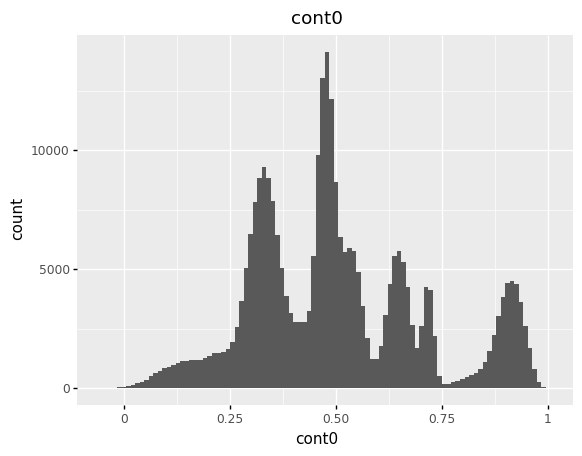

<ggplot: (8794137838421)>


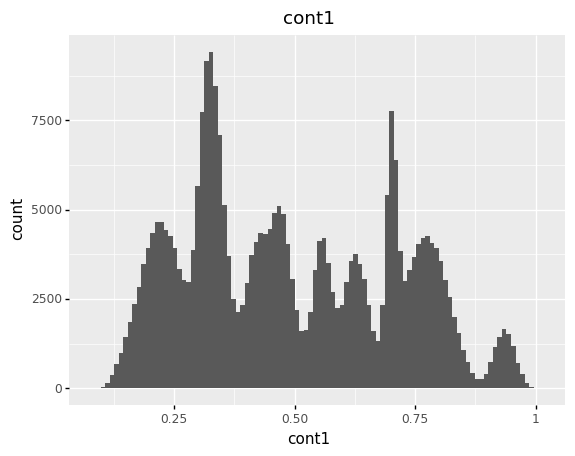

<ggplot: (8794137820760)>


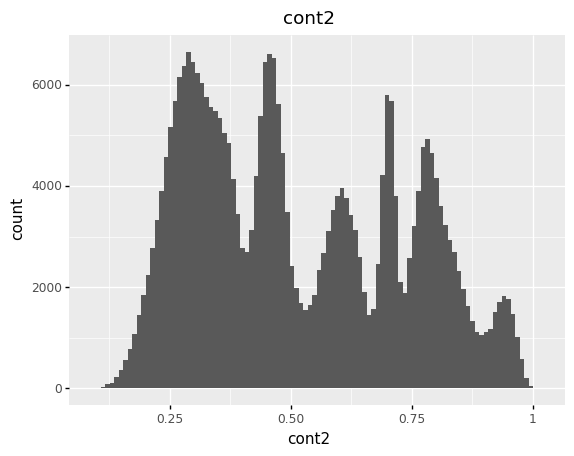

<ggplot: (8794135644082)>


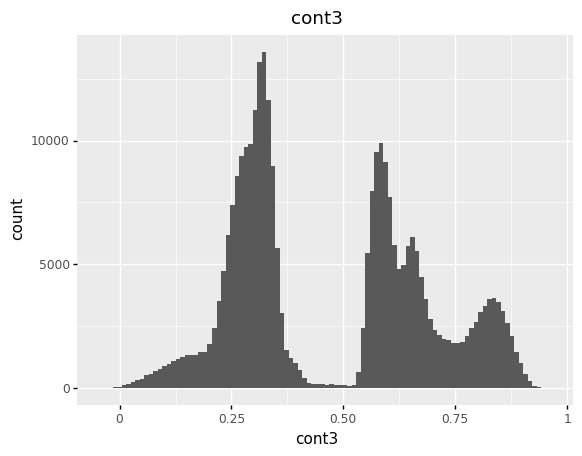

<ggplot: (8794135587940)>


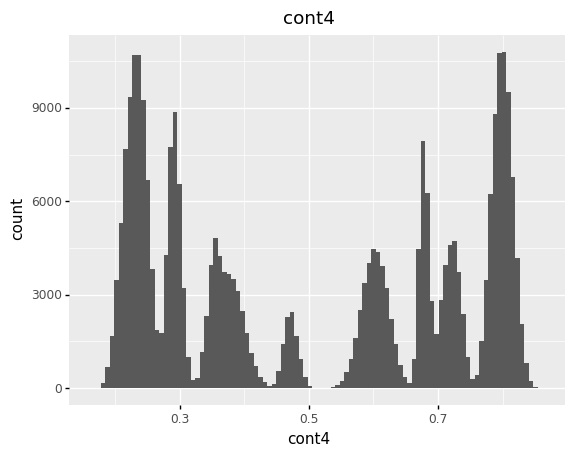

<ggplot: (8794135604667)>


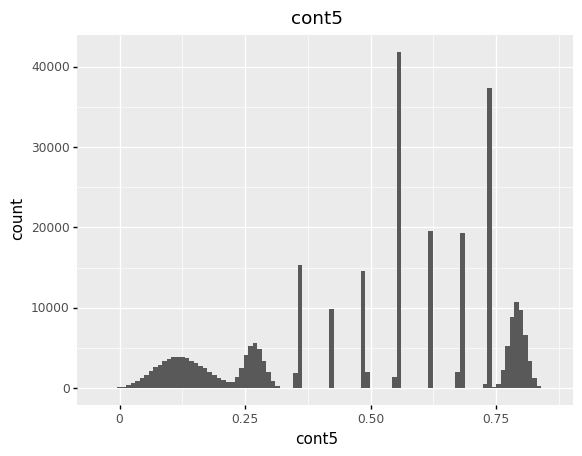

<ggplot: (8794135541785)>


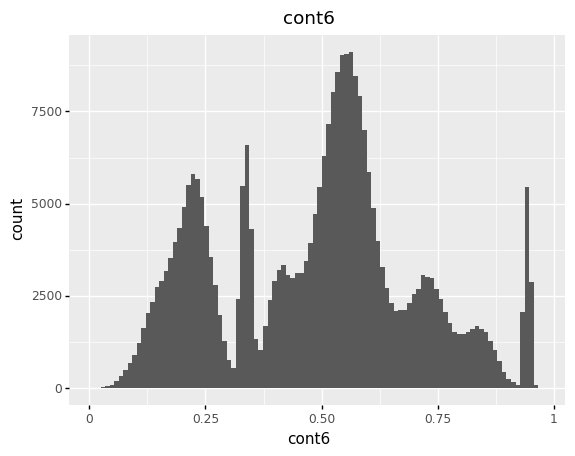

<ggplot: (8794135604526)>


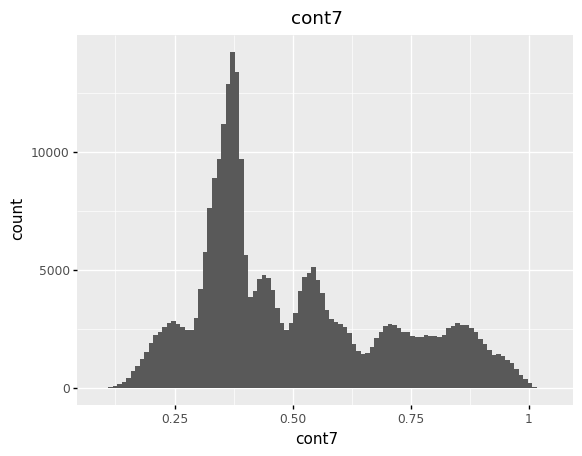

<ggplot: (8794135665939)>


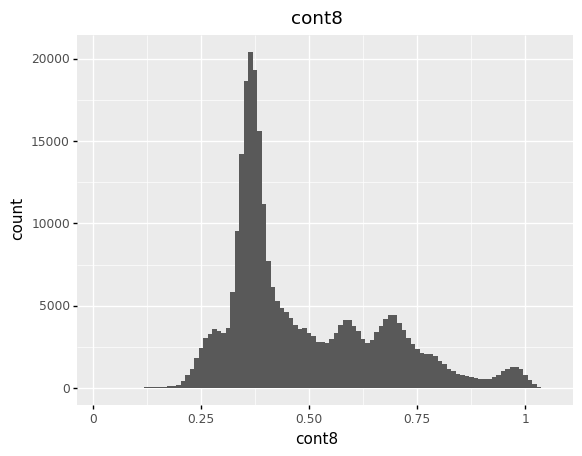

<ggplot: (8794135548170)>


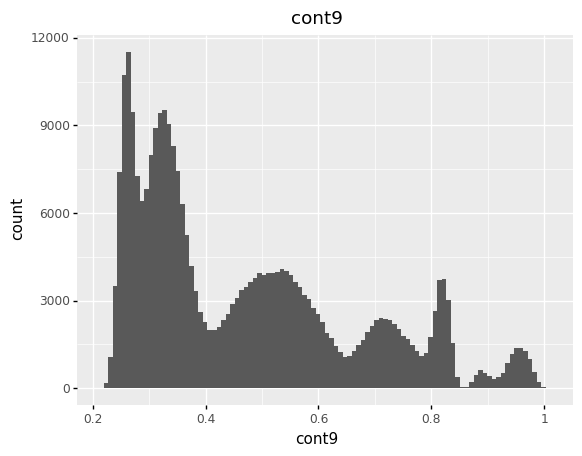

<ggplot: (8794135468924)>


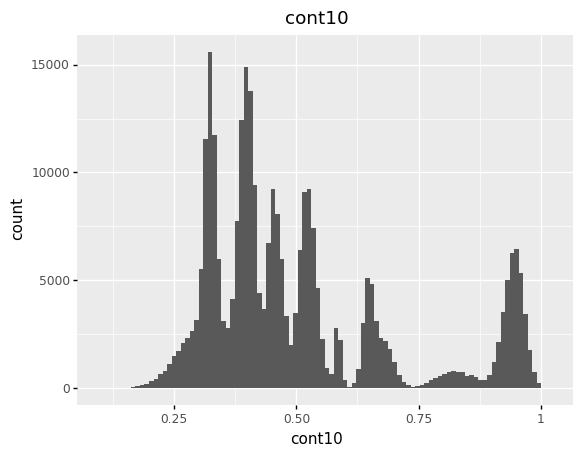

<ggplot: (8794135455386)>


In [13]:
for cont in cont_cols:
    print(ggplot(train, aes(x=cont))+geom_histogram(bins=100)+ggtitle(cont))

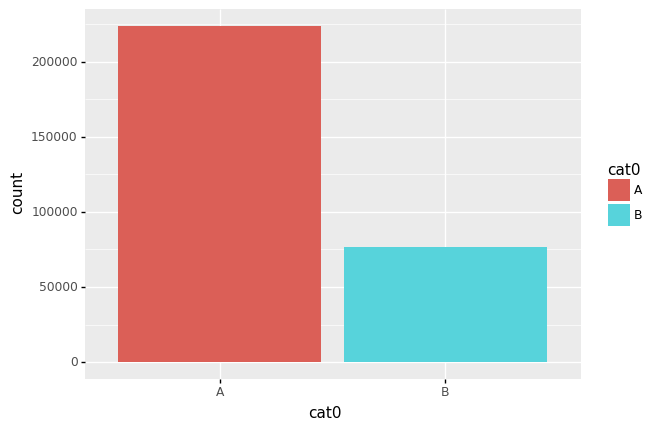

<ggplot: (8794135601213)>


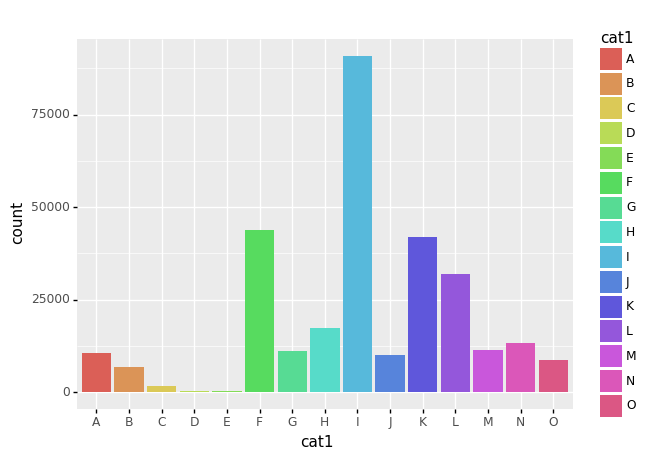

<ggplot: (8794135360796)>


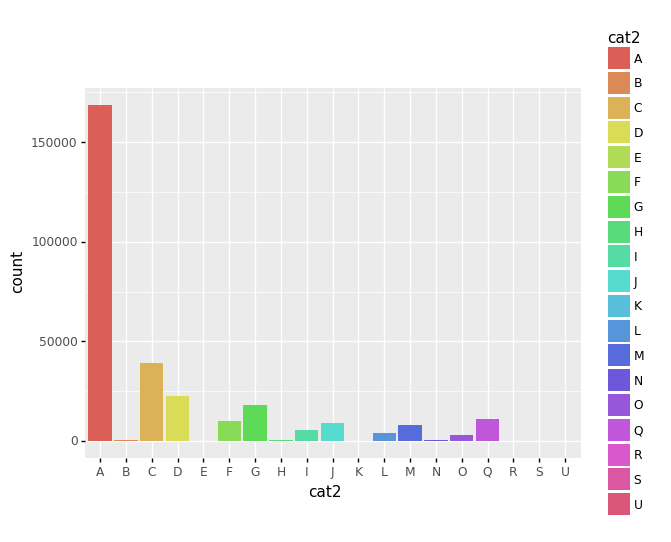

<ggplot: (8794135306813)>


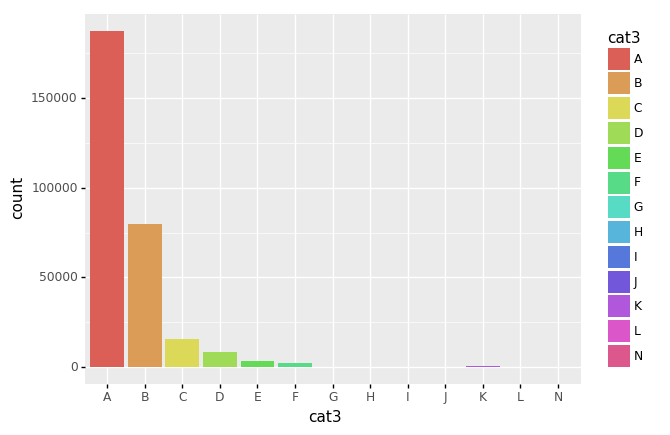

<ggplot: (8794135240259)>


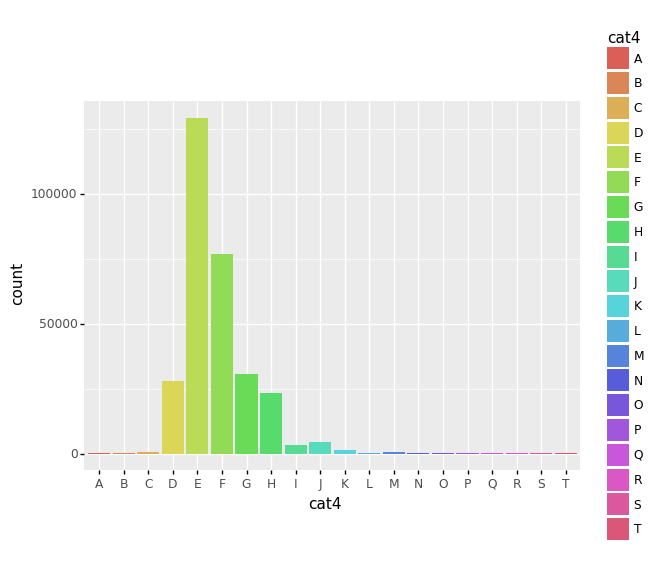

<ggplot: (8794135192236)>


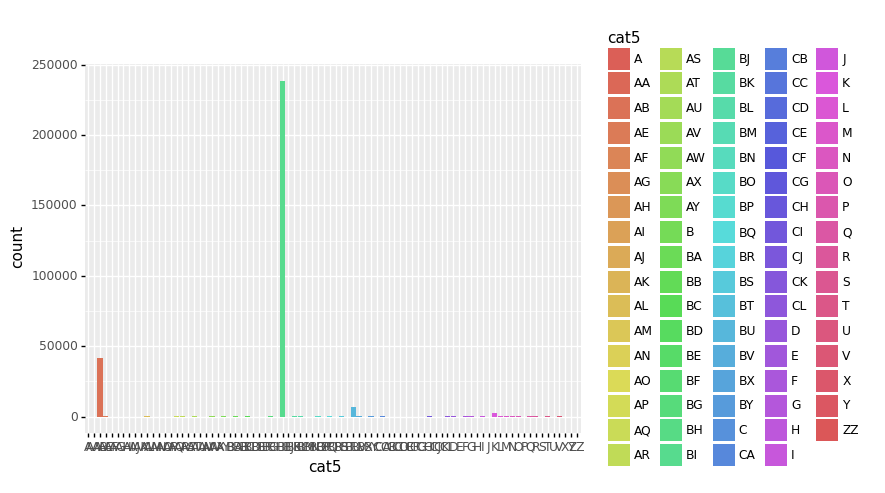

<ggplot: (8794135137796)>


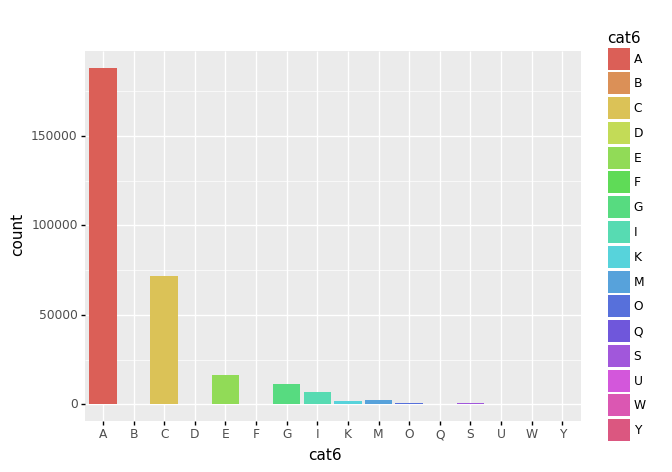

<ggplot: (8794135166242)>


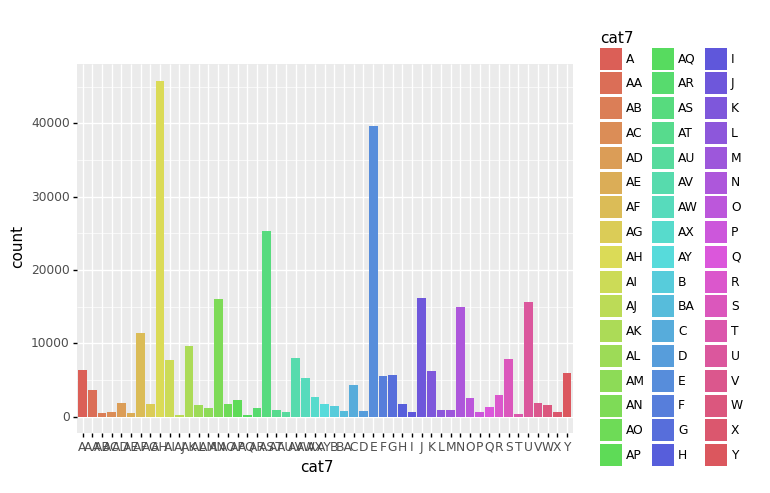

<ggplot: (8794135420823)>


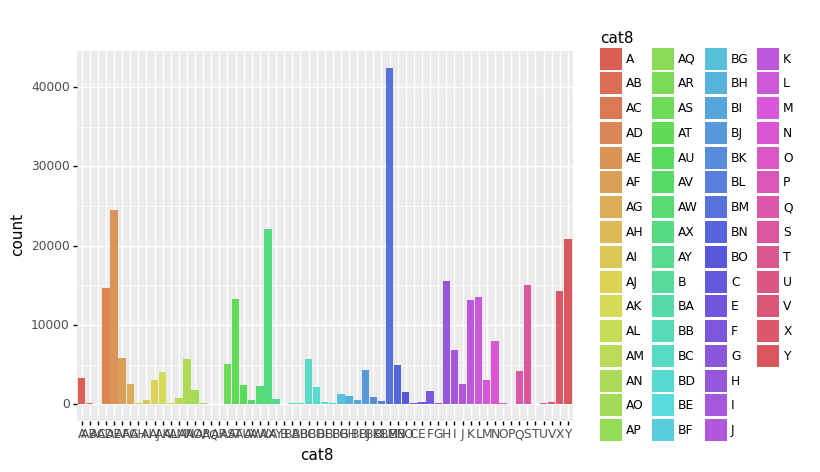

<ggplot: (8794135488895)>


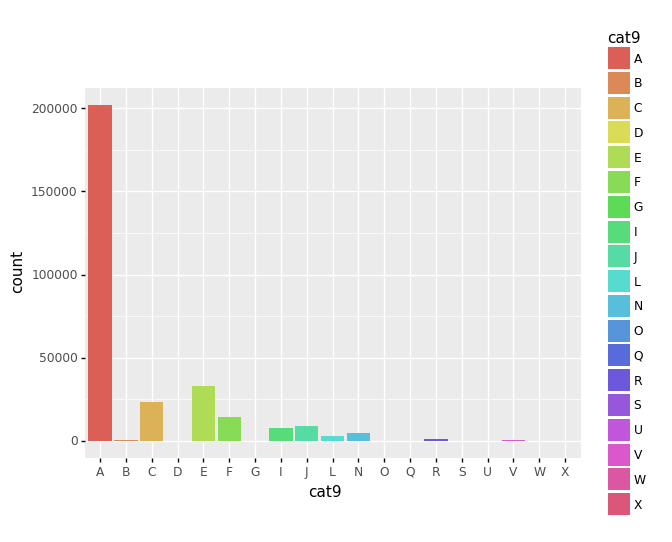

<ggplot: (8794134918069)>


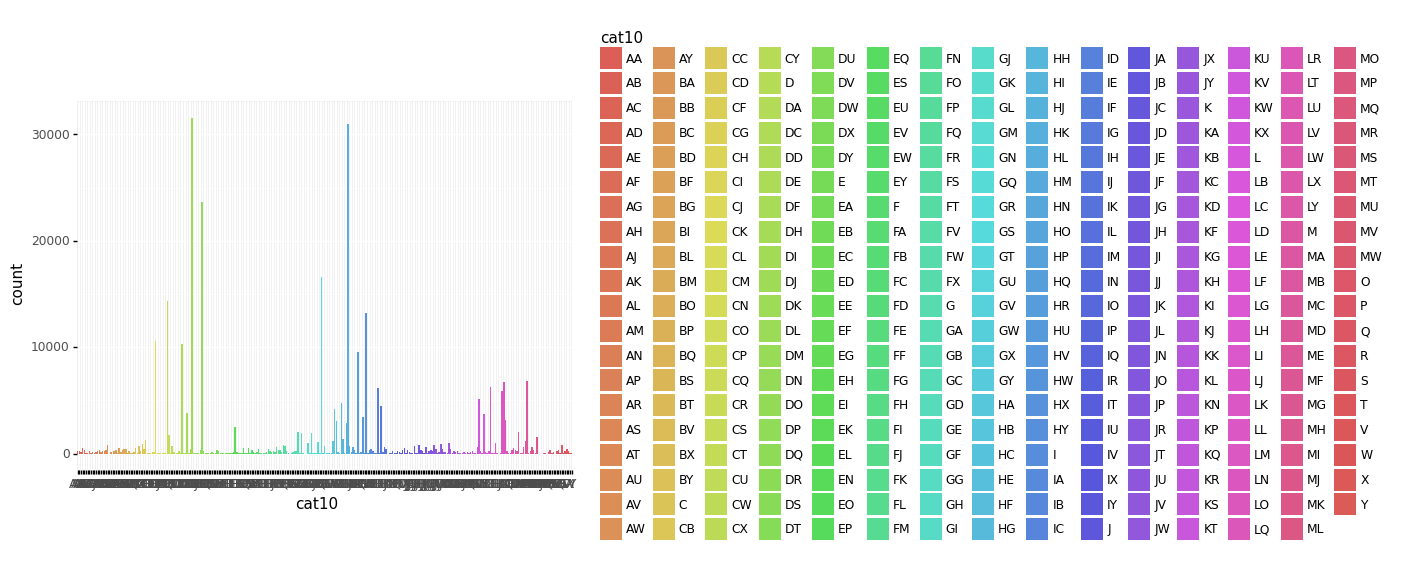

<ggplot: (8794135220321)>


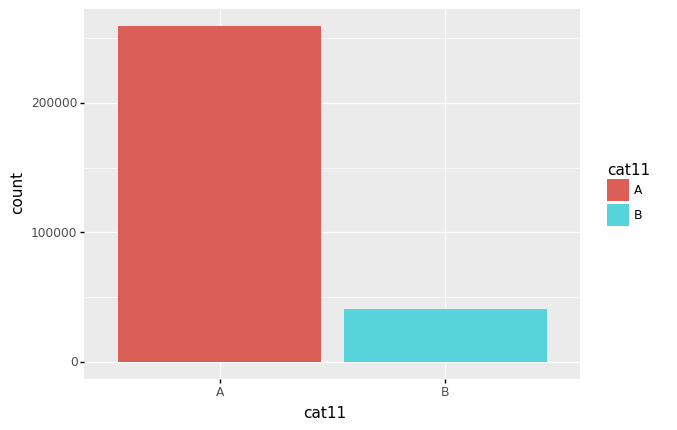

<ggplot: (8794135091113)>


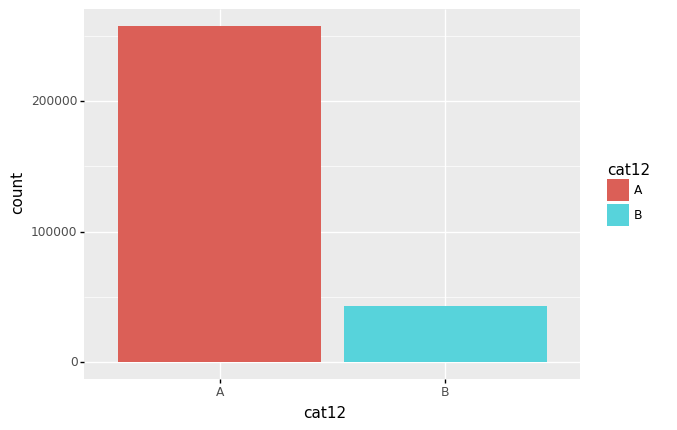

<ggplot: (8794135601165)>


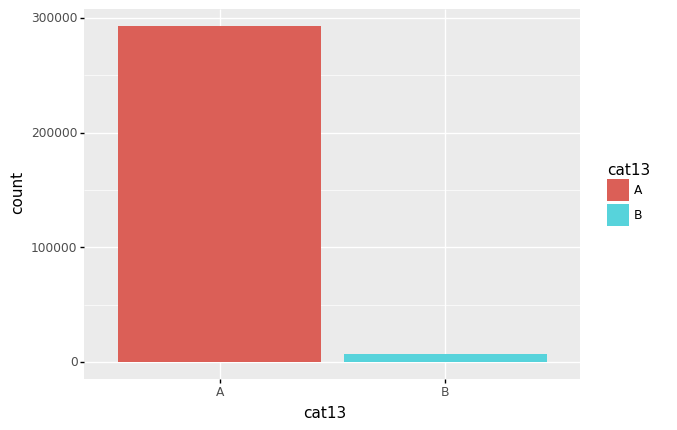

<ggplot: (8794135610332)>


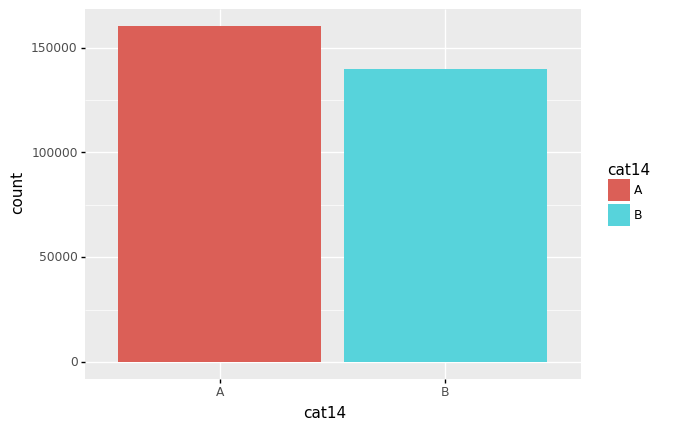

<ggplot: (8794134705378)>


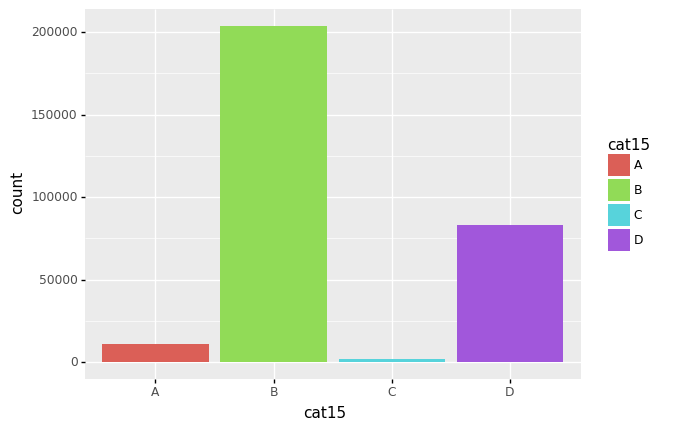

<ggplot: (8794137838502)>


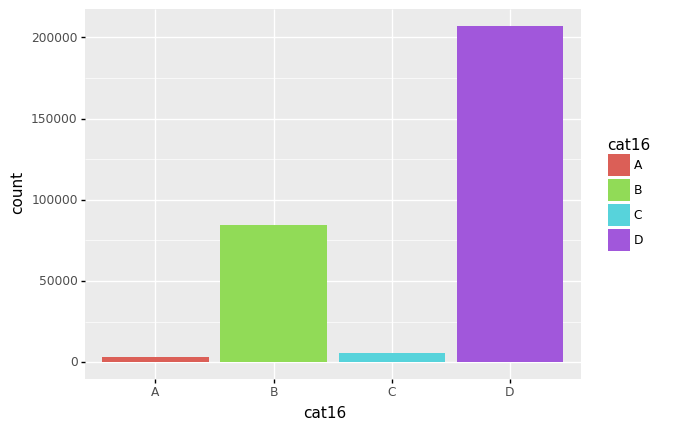

<ggplot: (8794135357447)>


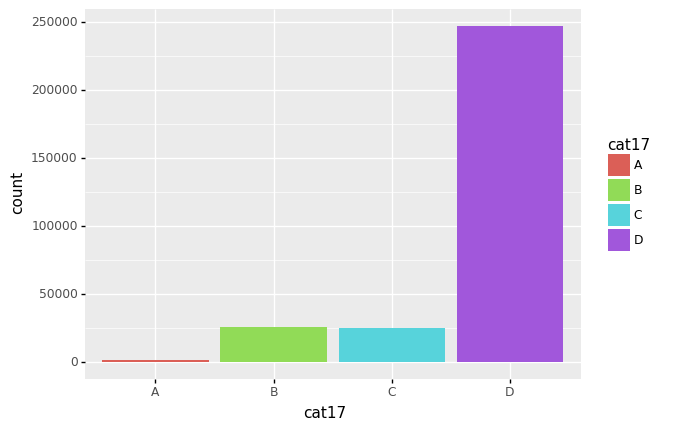

<ggplot: (8794135224128)>


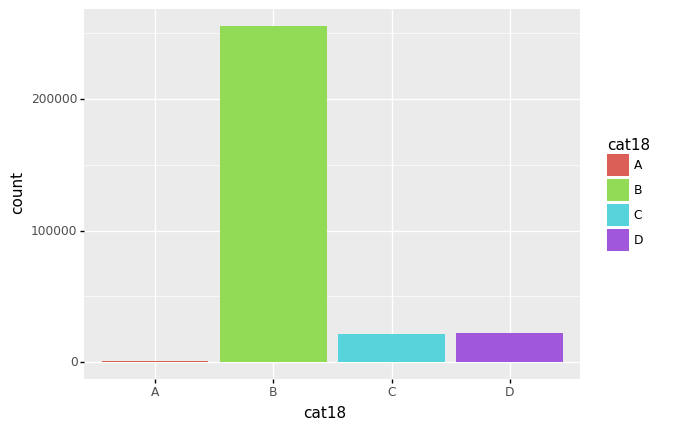

<ggplot: (8794135277502)>


In [14]:
for cat in cat_cols:
    train[cat] = train[cat].astype("category")
    print(ggplot(train, aes(x=cat, fill=cat))+geom_bar())

# Filtering out categories items with few data points

In [15]:
train = pd.read_csv('train.csv')
category_count = train.groupby('cat8').size().reset_index(name='count')
len(category_count)

61

In [16]:
filtered_category_count = category_count[category_count['count']>0.001*len(train)]
len(filtered_category_count)

41

In [17]:
from categorical_transform import CategoricalTransform, OneHotTransform
from sklearn.pipeline import Pipeline

In [18]:
portions = [0, 0.0005, 0.001, 0.005, 0.01, 0.05]
data_size = []
for min_data_portion in portions:
    ct = CategoricalTransform(cat_cols, min_data_portion = min_data_portion)
    pipe = Pipeline([('categorical_transform', ct), 
                    ('one hot', OneHotTransform())])
    data_size.append(pipe.fit_transform(train).shape[1])
pd.DataFrame(dict(min_cat_size=portions, num_columns=data_size))

,min_cat_size,num_columns
0,0.0000,636
1,0.0005,401
2,0.0010,299
3,0.0050,188
4,0.0100,152
5,0.0500,72


# Target vs single features

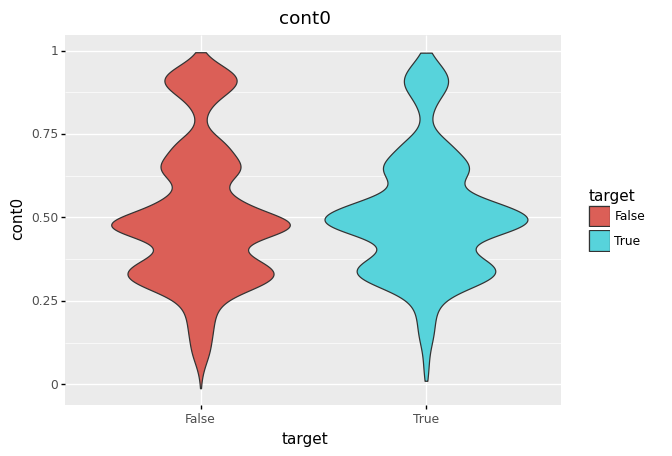

<ggplot: (8794135358606)>


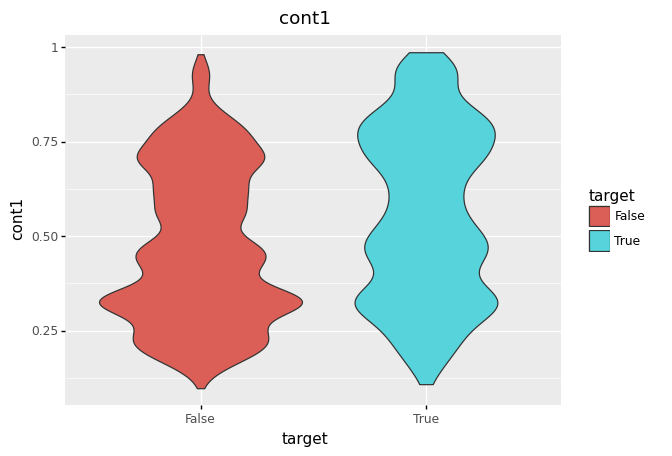

<ggplot: (8794135546362)>


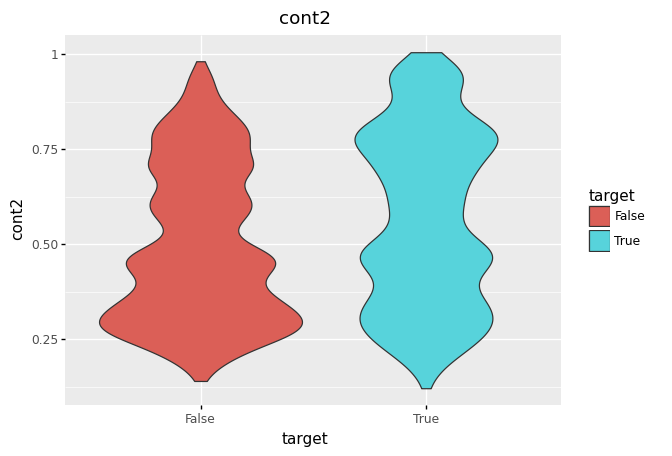

<ggplot: (8794135237220)>


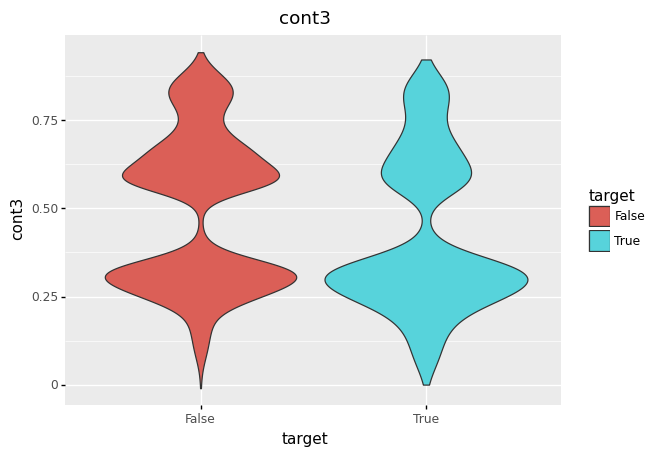

<ggplot: (8794135533529)>


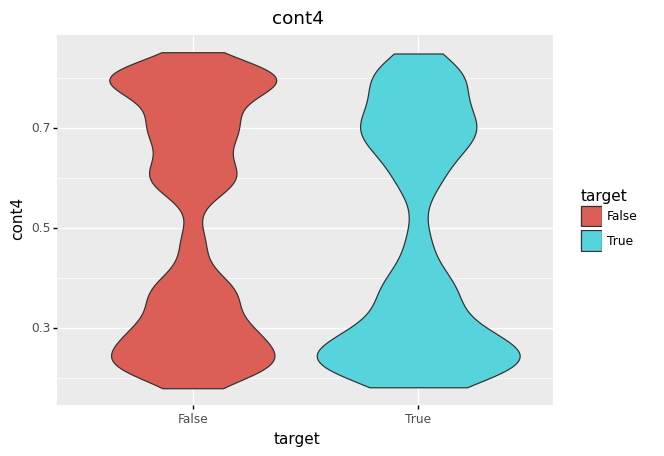

<ggplot: (8794135485296)>


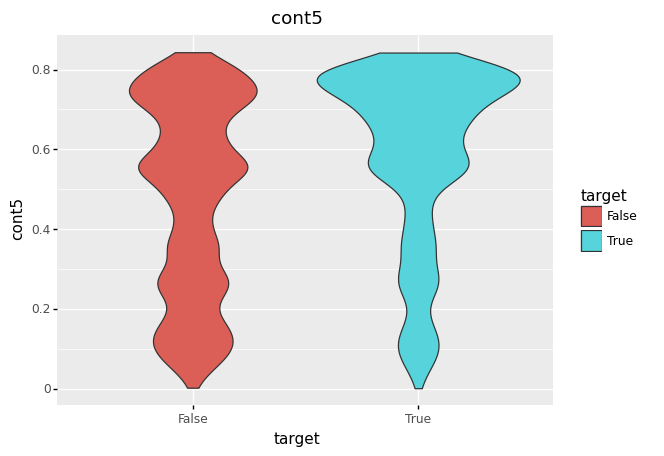

<ggplot: (8794135094745)>


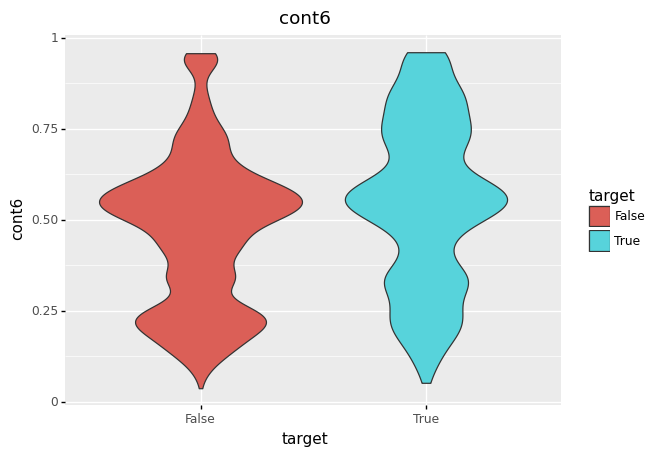

<ggplot: (8794135493057)>


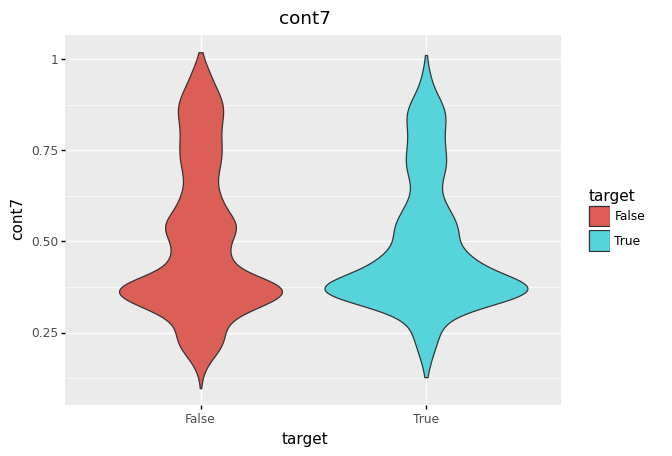

<ggplot: (8794134741020)>


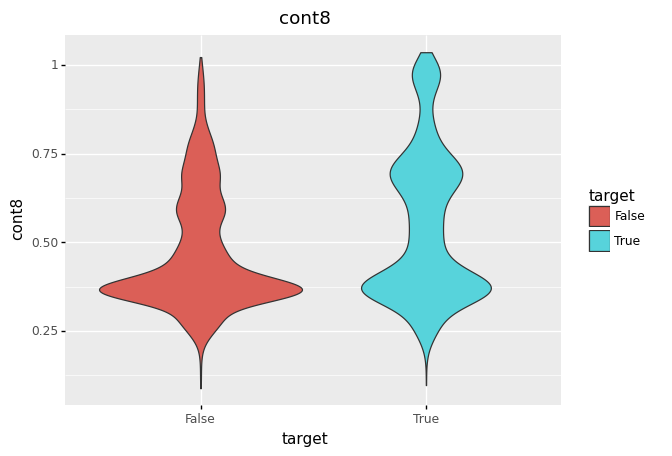

<ggplot: (8794134532834)>


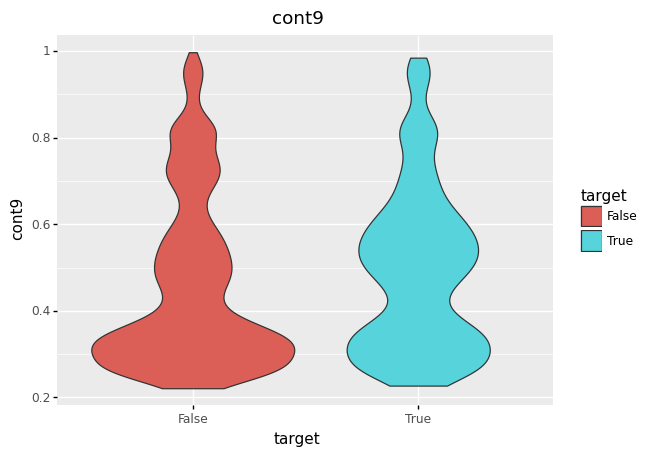

<ggplot: (8794135094637)>


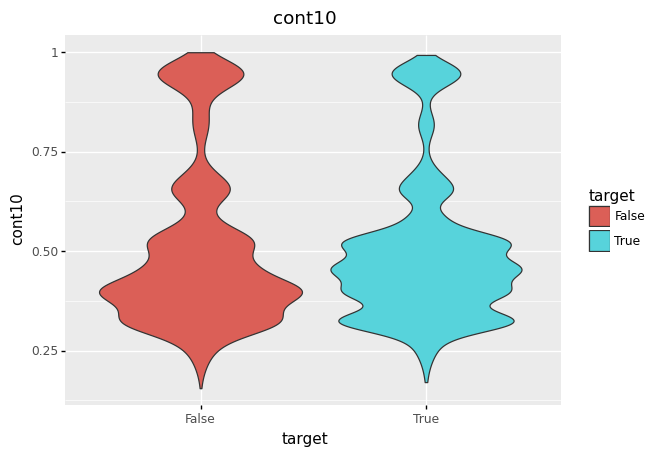

<ggplot: (8794135346098)>


In [27]:
train['target'] = train['target'].astype(bool)
train_sample = train.sample(10000)
for cont in cont_cols:
    print(ggplot(train_sample, aes(x='target', fill='target', y=cont))+geom_violin()+ggtitle(cont))

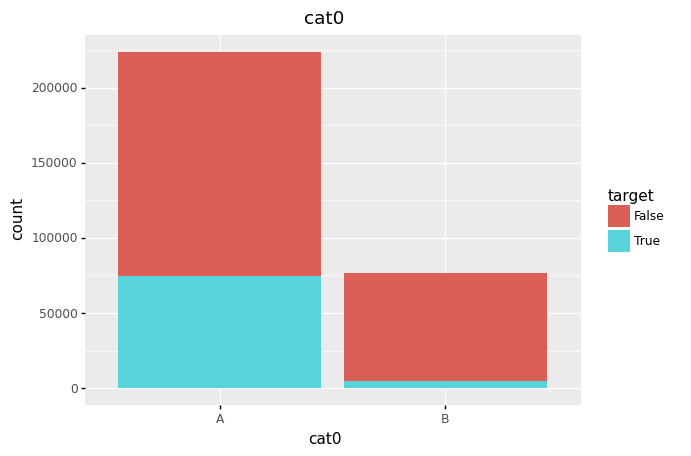

<ggplot: (8794135271563)>


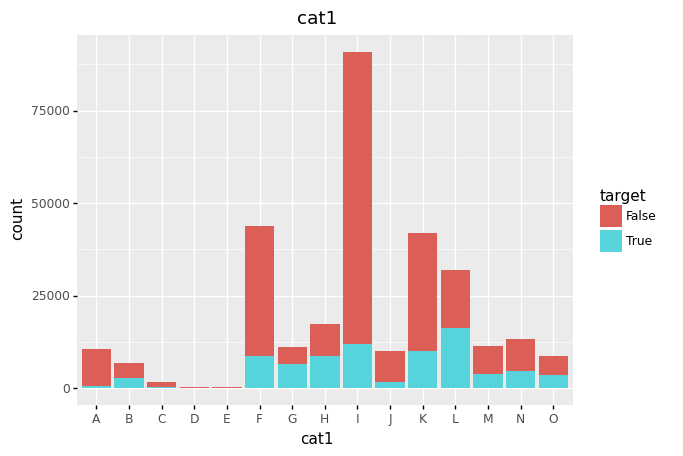

<ggplot: (8794135567538)>


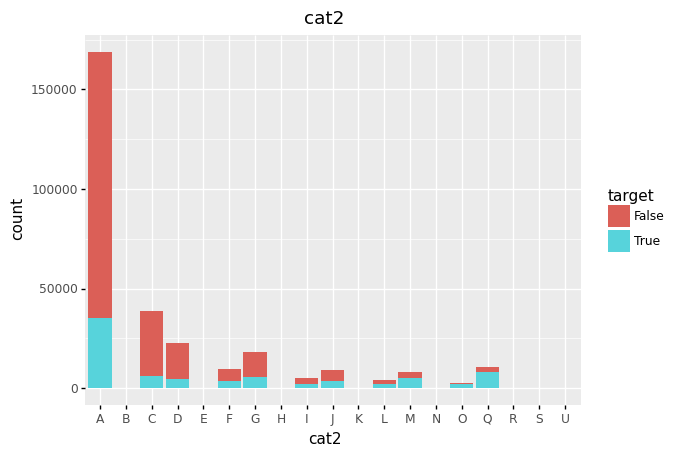

<ggplot: (8794134554236)>


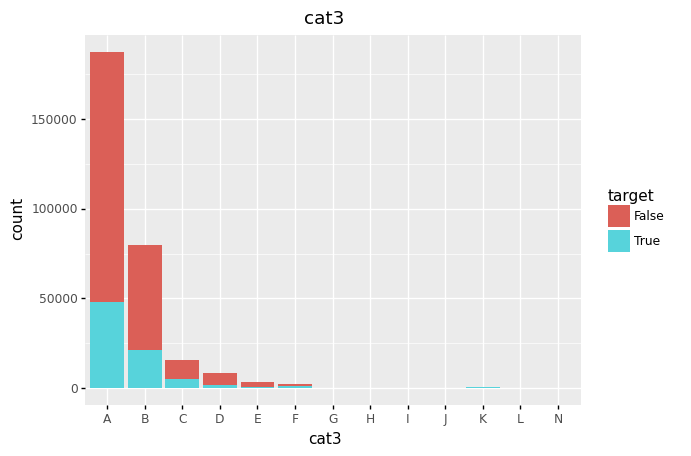

<ggplot: (8794135148566)>


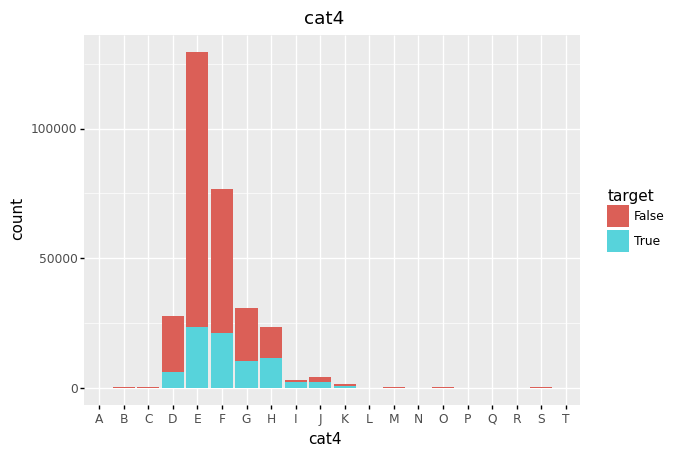

<ggplot: (8794135419615)>


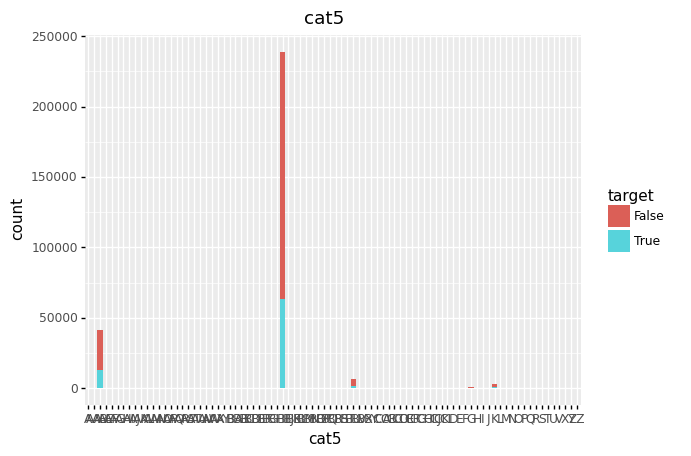

<ggplot: (8794134835264)>


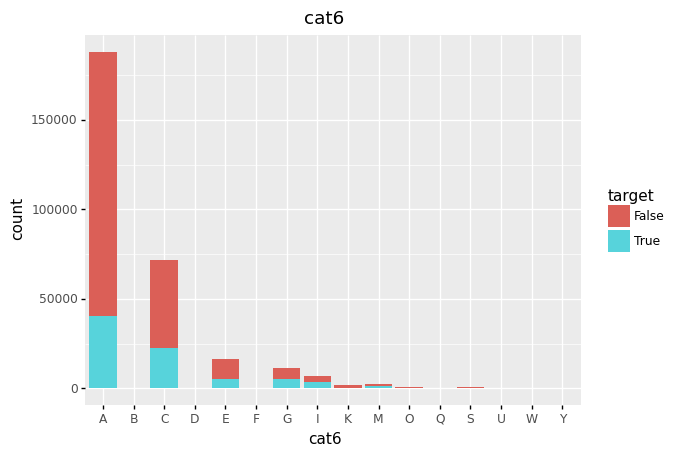

<ggplot: (8794135091053)>


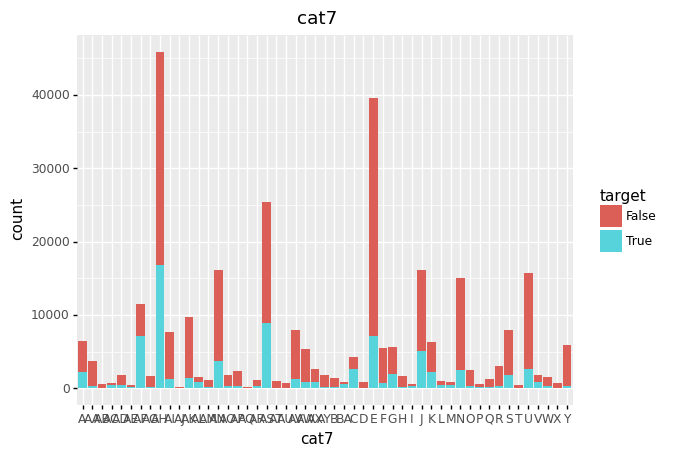

<ggplot: (8794135488877)>


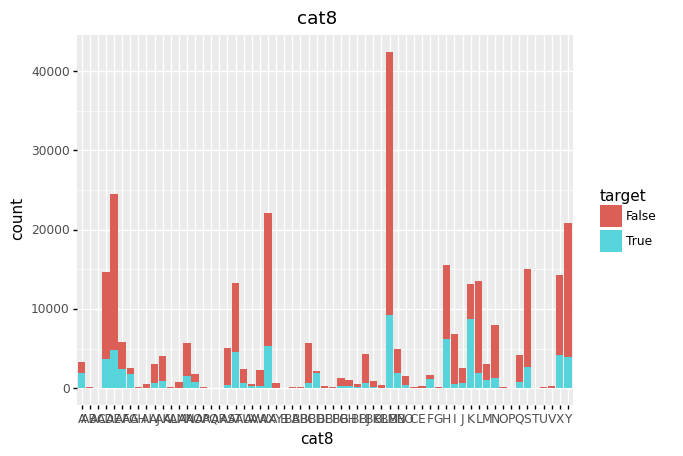

<ggplot: (8794135636125)>


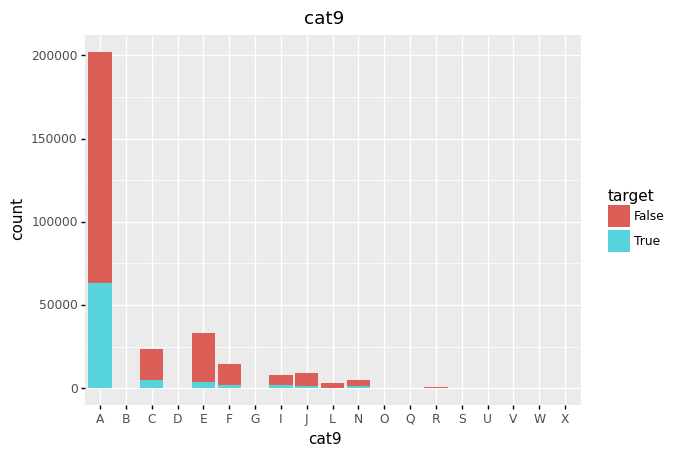

<ggplot: (8794134835264)>


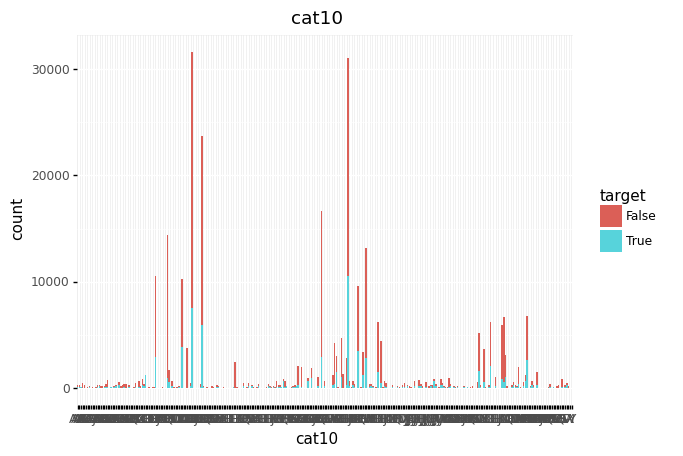

<ggplot: (8794134468985)>


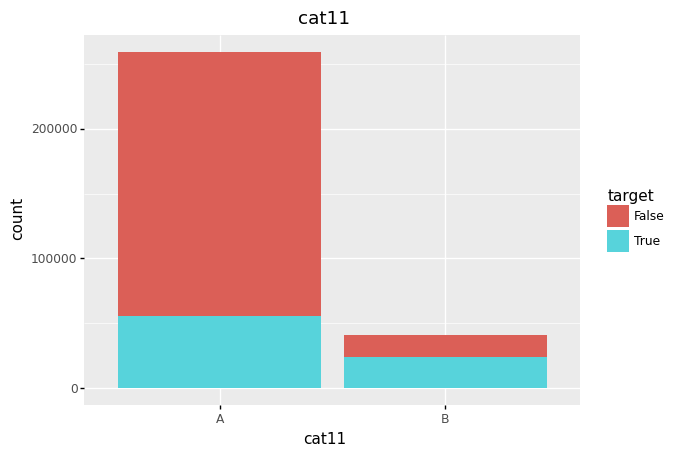

<ggplot: (8794135627240)>


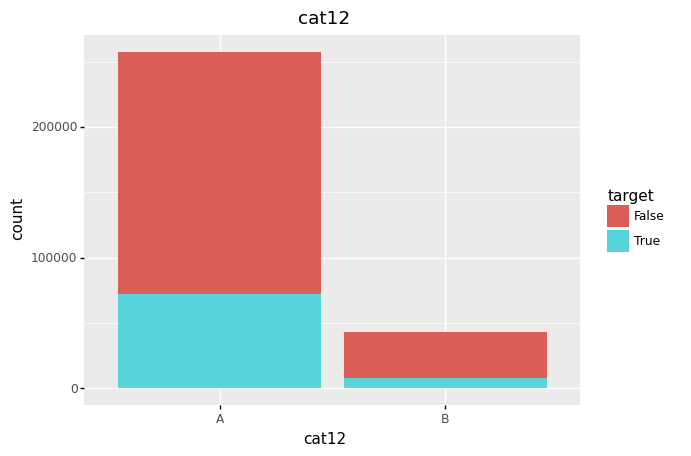

<ggplot: (8794135148719)>


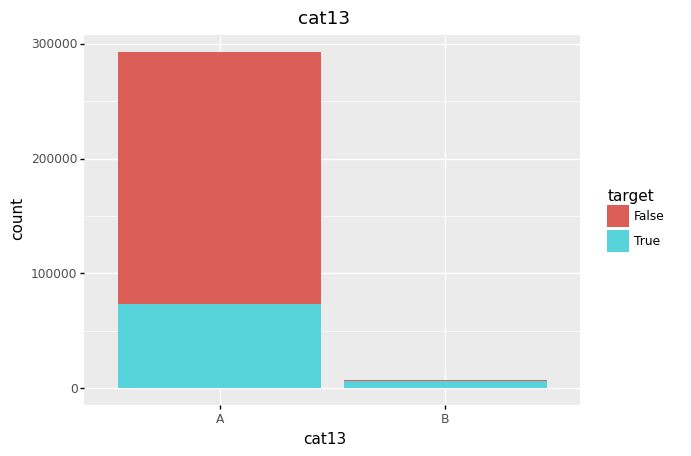

<ggplot: (8794135665818)>


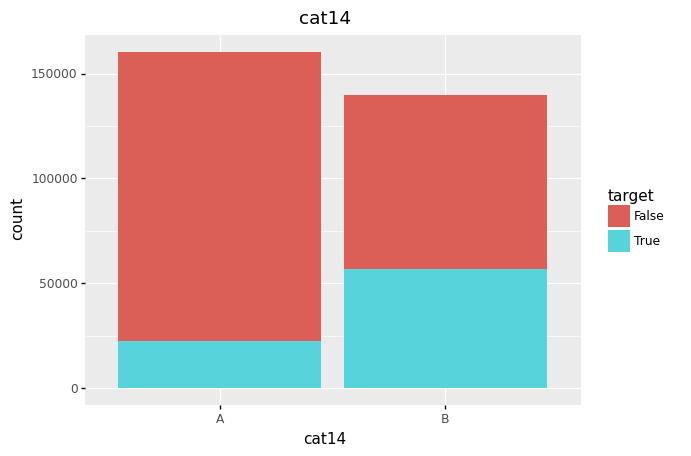

<ggplot: (8794134488899)>


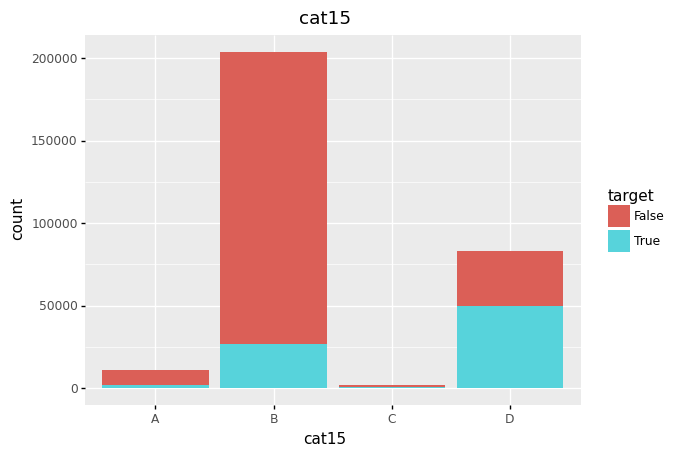

<ggplot: (8794134556115)>


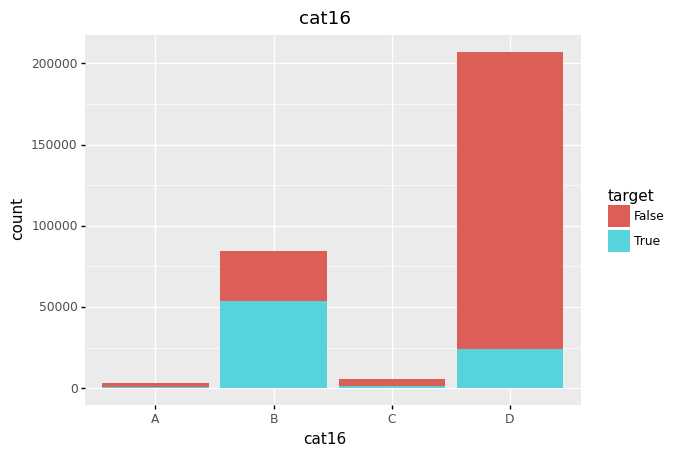

<ggplot: (8794134556118)>


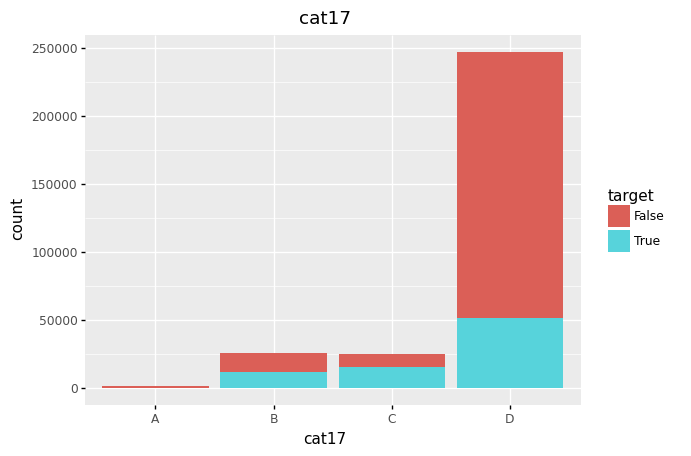

<ggplot: (8794135521287)>


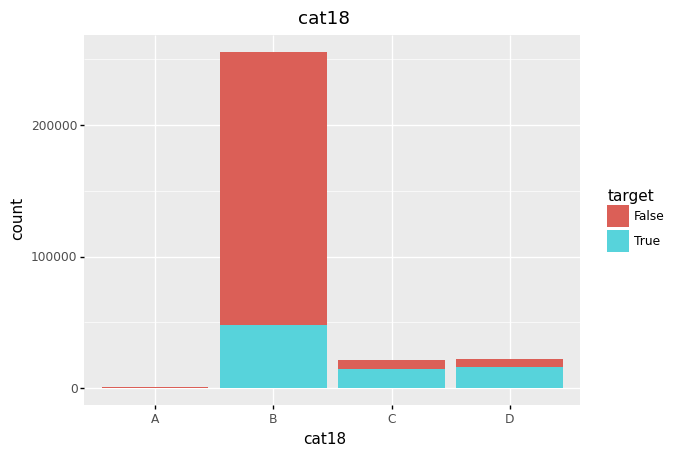

<ggplot: (8794134556118)>


In [31]:
for cat in cat_cols:
    print(ggplot(train, aes(x=cat, fill='target'))+geom_bar()+ggtitle(cat))